In [169]:
''''
ANÁLISE DAS COLUNAS DO DATASET

latitude, longitude
mag 						    | Magnitude local (ML) do evento
clustering_coefficient_30_days	 | Grau de agrupamento de eventos próximos nos últimos 30 dias
std_mag_30_days					| Desvio padrão das magnitudes em 30 dias
rolling_mean_depth_30_days		| Média móvel da profundidade dos terremotos nos últimos 30 dias
earthquakes_last_30_days		| Número total de terremotos registrados nos 30 dias anteriores
b_value							| Parâmetro da lei de Gutenberg-Richter

b_value_increment_i_i2 até b_value_increment_i8_i10 | Variações do b_value entre diferentes intervalos de tempo

max_mag_last_week				| Maior magnitude observada na última semana
eta								| Parâmetro estatístico relacionado à distribuição temporal dos eventos
delta_M							| Diferença de magnitude entre eventos consecutivos
elapsed_time					| Tempo decorrido desde o último evento significativo (em segundos)
coefficient_of_variation		 | Desvio padrão / média das magnitudes
dE1_2							| Diferença de energia entre eventos consecutivos
class							| Categoria de magnitude máxima esperada nos próximos 30 dias (variável alvo)

'''

"'\nANÁLISE DAS COLUNAS DO DATASET\n\nlatitude, longitude\nmag \t\t\t\t\t\t    | Magnitude local (ML) do evento\nclustering_coefficient_30_days\t | Grau de agrupamento de eventos próximos nos últimos 30 dias\nstd_mag_30_days\t\t\t\t\t| Desvio padrão das magnitudes em 30 dias\nrolling_mean_depth_30_days\t\t| Média móvel da profundidade dos terremotos nos últimos 30 dias\nearthquakes_last_30_days\t\t| Número total de terremotos registrados nos 30 dias anteriores\nb_value\t\t\t\t\t\t\t| Parâmetro da lei de Gutenberg-Richter\n\nb_value_increment_i_i2 até b_value_increment_i8_i10 | Variações do b_value entre diferentes intervalos de tempo\n\nmax_mag_last_week\t\t\t\t| Maior magnitude observada na última semana\neta\t\t\t\t\t\t\t\t| Parâmetro estatístico relacionado à distribuição temporal dos eventos\ndelta_M\t\t\t\t\t\t\t| Diferença de magnitude entre eventos consecutivos\nelapsed_time\t\t\t\t\t| Tempo decorrido desde o último evento significativo (em segundos)\ncoefficient_of_variation\t\

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_dataset = pd.read_csv('LosAngeles_Earthquake_Dataset.csv', sep=',', index_col=None)

df_dataset.shape

(22899, 20)

In [171]:
df_sorted = df_dataset.sort_values(by='earthquakes_last_30_days', ascending=False)

df_sorted.head(n=5)


,latitude,longitude,mag,clustering_coefficient_30_days,std_mag_30_days,rolling_mean_depth_30_days,earthquakes_last_30_days,b_value,b_value_increment_i_i2,b_value_increment_i2_i4,b_value_increment_i4_i6,b_value_increment_i6_i8,b_value_increment_i8_i10,max_mag_last_week,eta,delta_M,elapsed_time,coefficient_of_variation,dE1_2,class
13792,33.894333,-117.779000,1.17,0.989413,0.448434,4.530962,1227,0.545870,-0.001100,0.002323,-0.002066,0.001778,-0.010632,1.23,0.204295,-1.148006,136643.930000,1.292847,48165.734426,1
13790,34.066667,-117.500000,1.08,0.989560,0.448736,4.522863,1226,0.546970,0.003423,-0.000966,0.002878,-0.009532,-0.005989,1.23,0.202801,-1.140146,116212.109998,1.192857,48180.920908,1
13791,34.023833,-117.215167,1.05,0.989548,0.448615,4.528940,1226,0.542461,-0.002314,-0.002998,-0.004785,-0.001495,-0.015184,1.23,0.204013,-1.172566,133670.489999,1.155190,48199.481453,1
13789,34.022167,-117.514167,0.75,0.989551,0.448918,4.522482,1225,0.544775,-0.000684,-0.002471,0.000819,-0.012871,-0.013731,1.46,0.203809,-1.155865,120448.740002,1.173630,48187.362675,1
13788,34.065833,-117.498833,0.86,0.989542,0.448975,4.523529,1224,0.543548,-0.004389,-0.000545,-0.012955,-0.009412,-0.016399,1.46,0.204338,-1.164706,119825.410000,1.126953,48192.016526,1


In [172]:
df_dataset.describe()

,latitude,longitude,mag,clustering_coefficient_30_days,std_mag_30_days,rolling_mean_depth_30_days,earthquakes_last_30_days,b_value,b_value_increment_i_i2,b_value_increment_i2_i4,b_value_increment_i4_i6,b_value_increment_i6_i8,b_value_increment_i8_i10,max_mag_last_week,eta,delta_M,elapsed_time,coefficient_of_variation,dE1_2,class
count,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,2.289900e+04,22899.000000,2.289900e+04,22899.000000
mean,34.098283,-117.774704,1.242984,0.856713,0.513682,9.499822,187.486353,0.566452,-0.000012,-0.000019,-0.000017,-0.000012,-0.000008,2.011134,0.183617,-1.505311,8.572680e+05,1.178380,1.030659e+05,2.766802
std,0.217607,0.557759,0.533142,0.101443,0.086900,1.952025,169.563226,0.123275,0.036429,0.051324,0.062619,0.072082,0.080237,0.596065,0.012157,0.774624,3.851923e+05,0.287662,2.563266e+05,1.371584
min,33.191833,-119.320667,-0.340000,0.000000,0.000000,0.000000,0.000000,0.293007,-0.421920,-0.441820,-0.450243,-0.460616,-0.465576,0.760000,0.159844,-4.692859,2.914050e+03,0.696293,1.229661e+04,1.000000
25%,34.001333,-118.136167,0.880000,0.831420,0.467384,9.100554,122.000000,0.478825,-0.009439,-0.015564,-0.020930,-0.026094,-0.031177,1.600000,0.174250,-1.972016,6.761044e+05,1.005826,2.894654e+04,2.000000
50%,34.054167,-117.539167,1.130000,0.856743,0.507376,9.972286,142.000000,0.554938,0.000115,0.000000,0.000124,0.000254,0.000243,1.910000,0.181145,-1.454941,8.873355e+05,1.120812,4.333446e+04,3.000000
75%,34.208167,-117.313000,1.500000,0.889982,0.559472,10.509430,177.000000,0.641688,0.009778,0.016235,0.021777,0.027361,0.032104,2.320000,0.190756,-1.001759,1.094321e+06,1.272317,7.783019e+04,4.000000
max,34.942167,-117.158333,5.496776,0.992260,0.765815,15.568651,1227.000000,1.117587,0.420602,0.470425,0.473283,0.474226,0.474092,5.496776,0.236607,1.157047,2.365254e+06,6.284059,3.337624e+06,6.000000


In [173]:
df_removed = df_dataset.drop(columns=[
	'b_value_increment_i_i2',
	'b_value_increment_i2_i4',
	'b_value_increment_i4_i6',
	'b_value_increment_i6_i8',
	'b_value_increment_i8_i10',
	'rolling_mean_depth_30_days',
	#'std_mag_30_days'
])
df_removed.shape

(22899, 14)

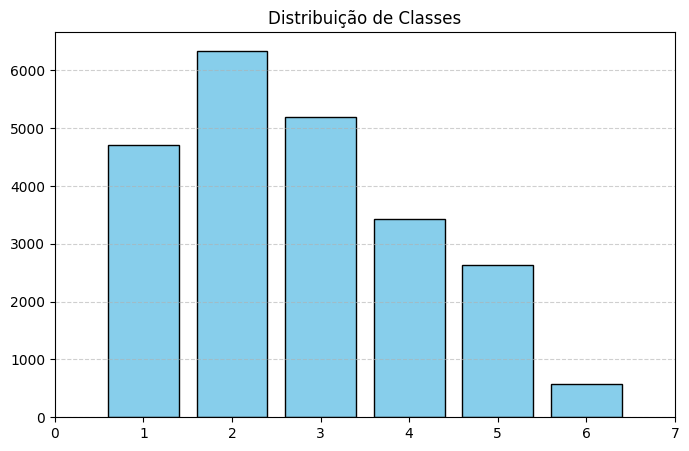

In [174]:
class_counts = df_removed['class'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')

plt.title('Distribuição de Classes')
plt.xticks(range(0, 8))

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

(array([1.000e+00, 1.500e+01, 5.200e+01, 2.580e+02, 1.164e+03, 3.044e+03,
        4.694e+03, 3.782e+03, 3.048e+03, 2.245e+03, 1.615e+03, 9.610e+02,
        7.230e+02, 4.220e+02, 3.140e+02, 2.050e+02, 1.210e+02, 7.700e+01,
        4.400e+01, 3.500e+01, 2.500e+01, 1.700e+01, 8.000e+00, 9.000e+00,
        1.100e+01, 4.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([-0.34      , -0.1454408 ,  0.04911841,  0.24367761,  0.43823681,
         0.63279601,  0.82735522,  1.02191442,  1.21647362,  1.41103283,
         1.60559203,  1.80015123,  1.99471043,  2.18926964,  2.38382884,
         2.57838804,  2.77294725,  2.96750645,  3.16206565,  3.35662485,
         3.55118406,  3.74574326,  3.94030246,  4.13486166,  4.32942087,
         4.52398007,  4.71853927,  4.91309848,  5.10765768,  5.30221688,
         5.49677608]),
 <BarContainer object of 30 artists>)

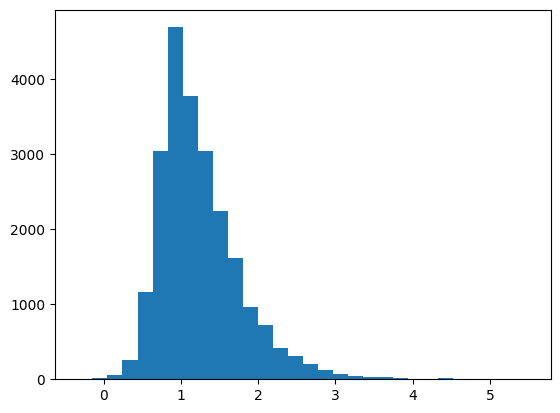

In [178]:
plt.hist(df_removed['mag'], bins=30)

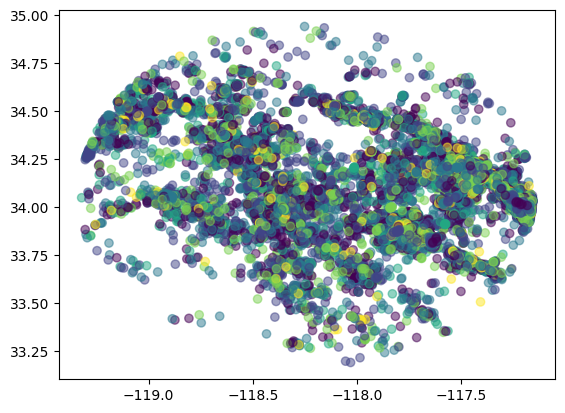

In [176]:
plt.scatter(df_removed['longitude'], df_removed['latitude'], c=df_removed['class'], alpha=0.5)

In [177]:
# import folium
# from folium.plugins import HeatMap

# mapa = folium.Map(
#     location=[df_removed['latitude'].mean(), df_removed['longitude'].mean()],
#     zoom_start=2, 
#     tiles='CartoDB dark_matter'
# )

# heat_data = df_removed[['latitude', 'longitude', 'mag']].values.tolist()
# HeatMap(heat_data, radius=10, blur=15, max_zoom=6).add_to(mapa)

# mapa

<Axes: xlabel='class', ylabel='earthquakes_last_30_days'>

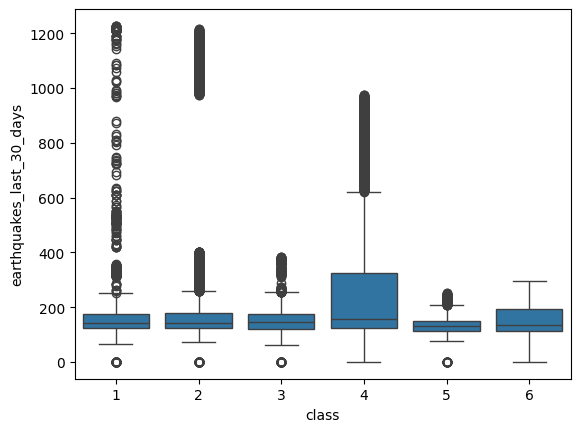

In [179]:
sns.boxplot(x=df_removed['class'], y=df_removed['earthquakes_last_30_days'])

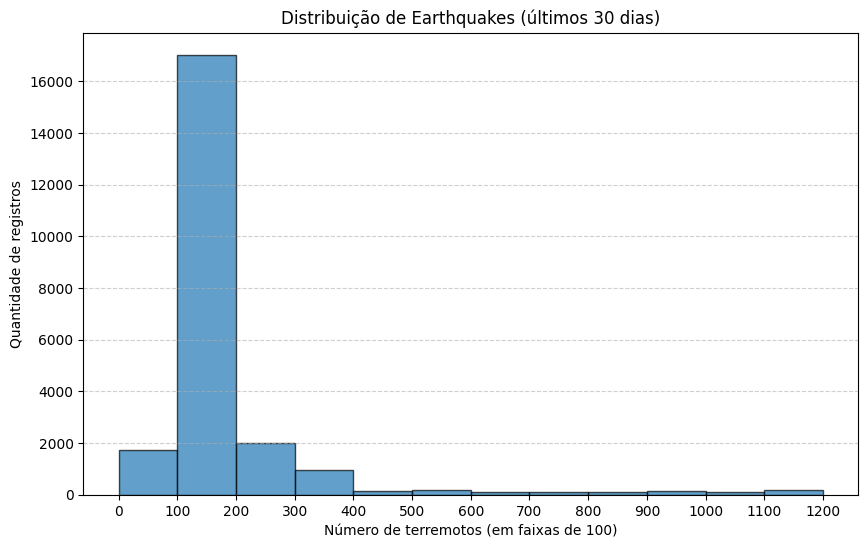

In [175]:
bins = range(0, 1300, 100)

plt.figure(figsize=(10, 6))
plt.hist(df_removed['earthquakes_last_30_days'], bins=bins, edgecolor='black', alpha=0.7)

plt.title('Distribuição de Earthquakes (últimos 30 dias)')
plt.xlabel('Número de terremotos (em faixas de 100)')
plt.ylabel('Quantidade de registros')
plt.xticks(bins)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<Axes: xlabel='class', ylabel='max_mag_last_week'>

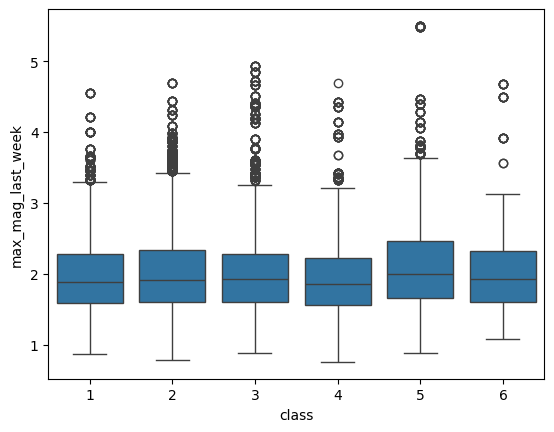

In [180]:
sns.boxplot(x=df_removed['class'], y=df_removed['max_mag_last_week'])

<Axes: xlabel='class', ylabel='clustering_coefficient_30_days'>

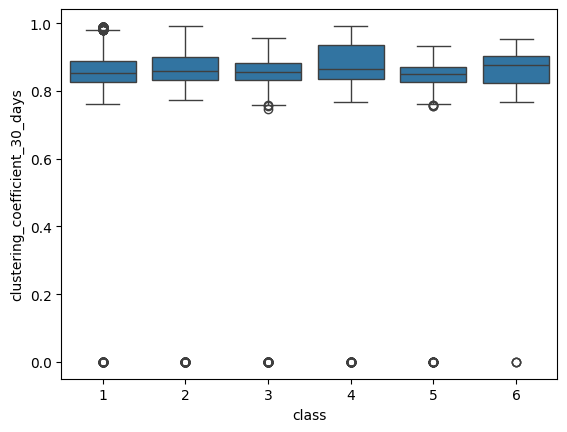

In [181]:
sns.boxplot(x=df_removed['class'], y=df_removed['clustering_coefficient_30_days'])

<Axes: xlabel='class', ylabel='b_value'>

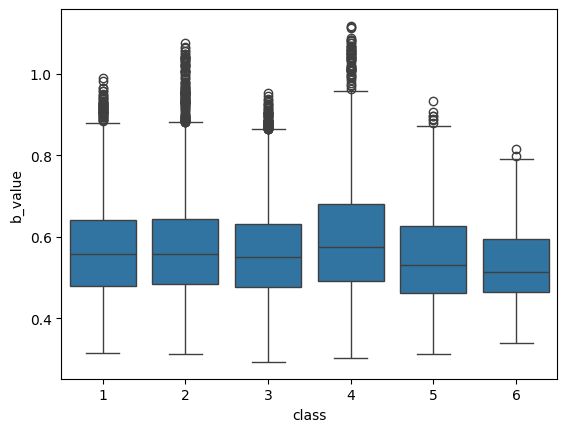

In [182]:
sns.boxplot(x=df_removed['class'], y=df_removed['b_value'])

<Axes: xlabel='class', ylabel='eta'>

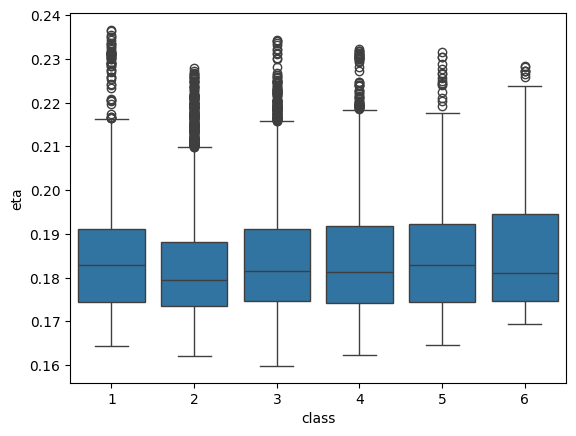

In [183]:
sns.boxplot(x=df_removed['class'], y=df_removed['eta'])

<Axes: xlabel='class', ylabel='elapsed_time'>

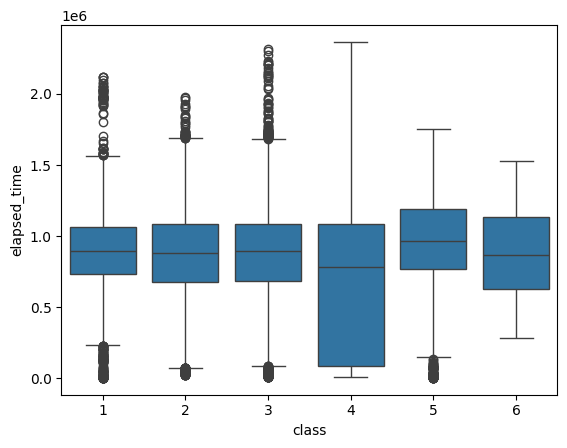

In [184]:
sns.boxplot(x=df_removed['class'], y=df_removed['elapsed_time'])

<Axes: >

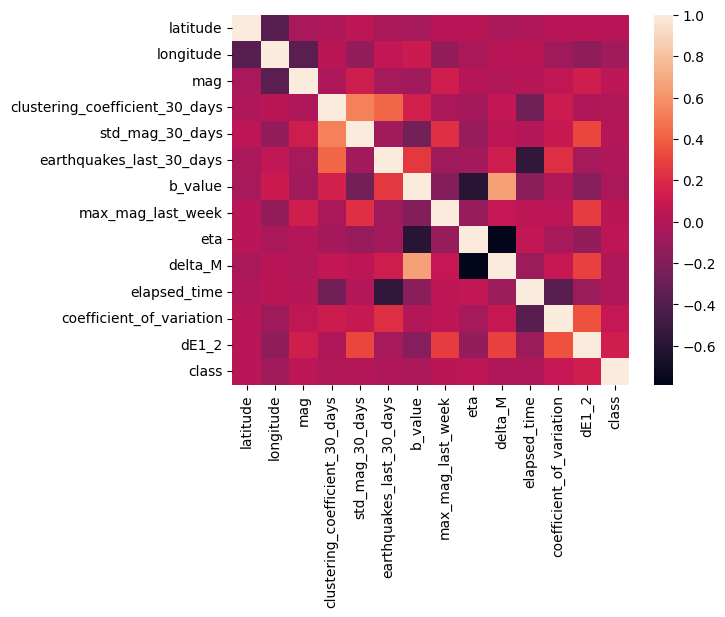

In [185]:
sns.heatmap(df_removed.corr(), annot=False)